Notebook for testing the function get_2d_confidence_ellipse

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import path
import matplotlib.pyplot as plt
import numpy as np
import numpy.random


from janelia_core.stats.utils import get_2d_confidence_ellipse

## Parameters go here 

In [3]:
# Parameters of Gaussian we want the confidence ellipse for
mn = np.asarray([1, 2])
cov = np.asarray([[1, .2], [.2, 1]])

# Number of samples we pull from the distribution for seeing if the confidence ellipse is correct
n_smps = 10000

## Get confidence ellipse

In [4]:
ellipse_pts = ellipse_pts = get_2d_confidence_ellipse(mn=mn, cov=cov, conf=.7, n_side_pts=1000)

## Generate samples from distribution

In [5]:
smps = numpy.random.multivariate_normal(mean=mn, cov=cov, size=n_smps)

## Visualize samples with ellipse

(-3.14923559134633, 5.003176467760689, -2.391508396426783, 6.128780668139524)

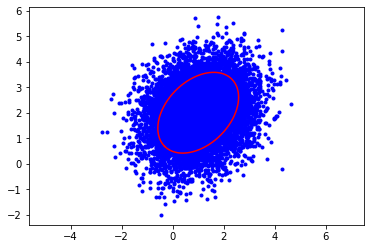

In [6]:
plt.figure()
plt.plot(smps[:,0], smps[:,1], 'b.')
plt.plot(ellipse_pts[:,0], ellipse_pts[:,1], 'r-')
plt.axis('equal')

## See how many of the sample points are in the ellipse

In [7]:
ellipse_path = path.Path([(ellipse_pts[i,0], ellipse_pts[i,1]) for i in range(ellipse_pts.shape[0])])
n_contained_pts = np.sum(ellipse_path.contains_points(smps))
print('Percent of contained points: ' + str(n_contained_pts/n_smps))

Percent of contained points: 0.6886
